# Importing libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Importing Dataset

In [4]:
partical_data =pd.read_csv('magic04.data',header=None)
partical_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


### Dataset does not contain the header labels to determine from which column did they belong to so we need to add those seperately

In [6]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

partical_data.columns=cols
partical_data.head(2)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


In [7]:
partical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


### since the class column is in the char datatype so we need to convert it into the numerical format so that we can move further with the work because computer can only process the numerical values

In [9]:
partical_data['class'].unique()

array(['g', 'h'], dtype=object)

#### as we can see there is only 2 unique values there,
#### g ==>> gamma : h==>> hadron

In [11]:
partical_data['class']=(partical_data['class']=='g').astype(int)
partical_data.head(2)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1


#### lets see the distribution of the data between the class column

In [13]:
partical_data['class'].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

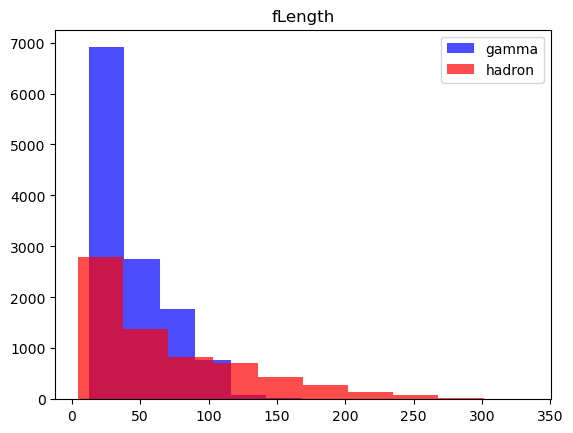

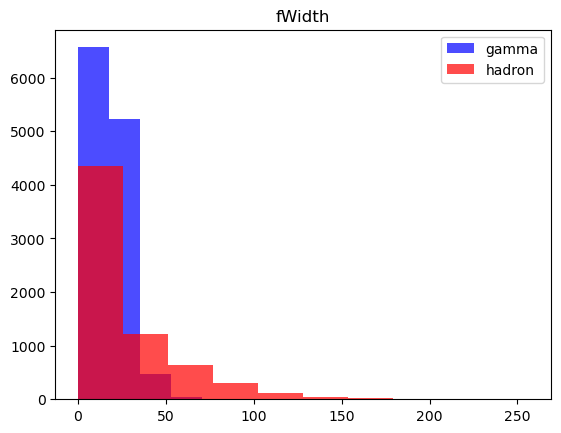

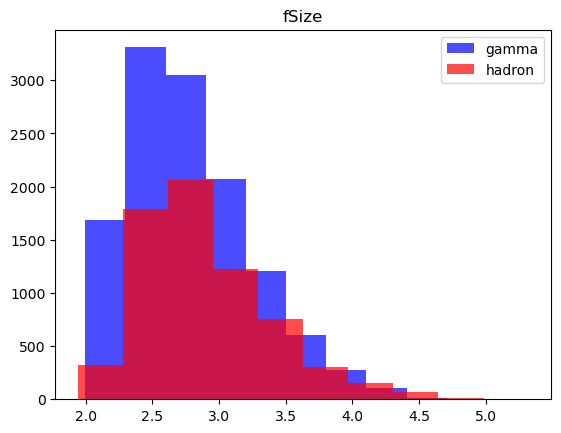

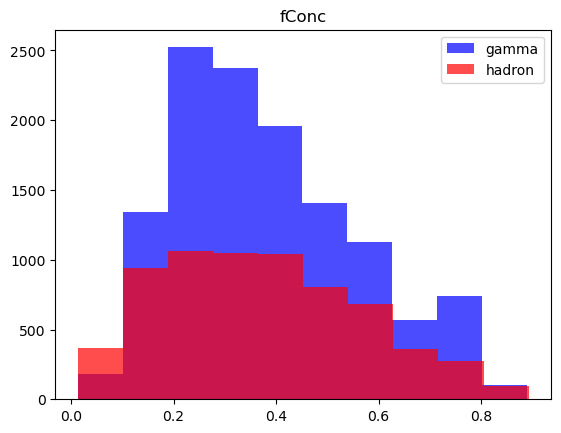

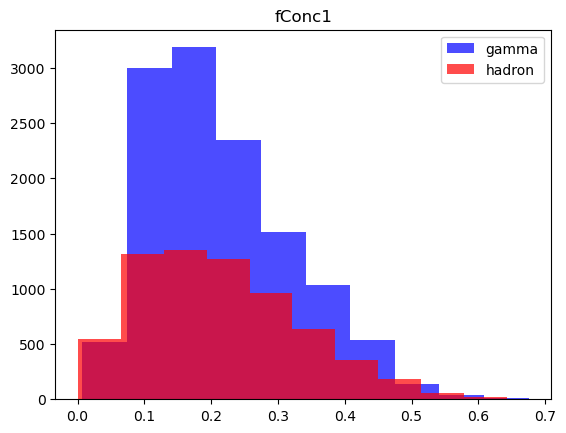

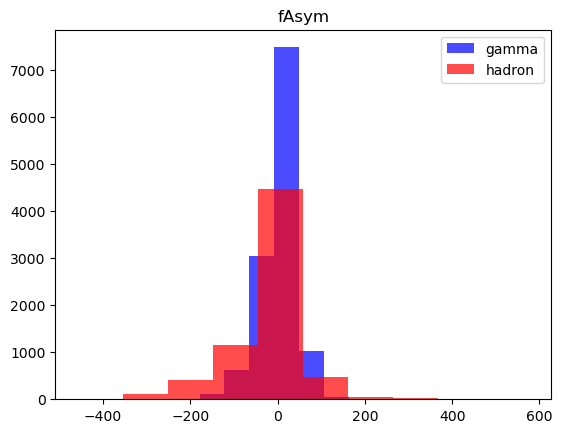

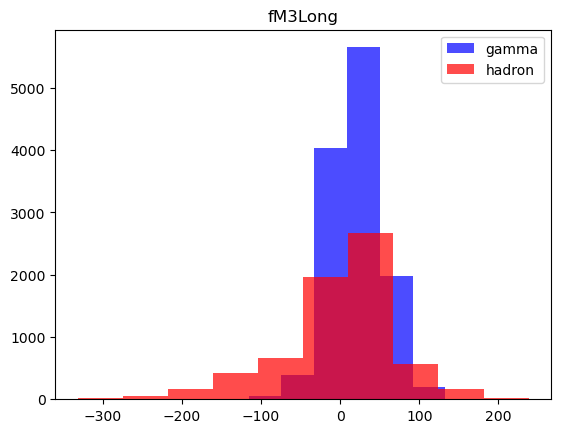

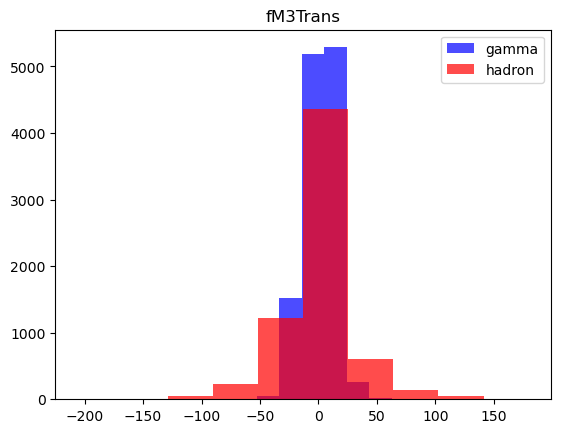

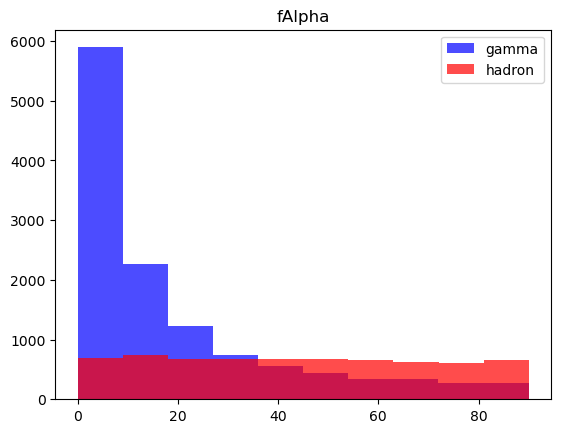

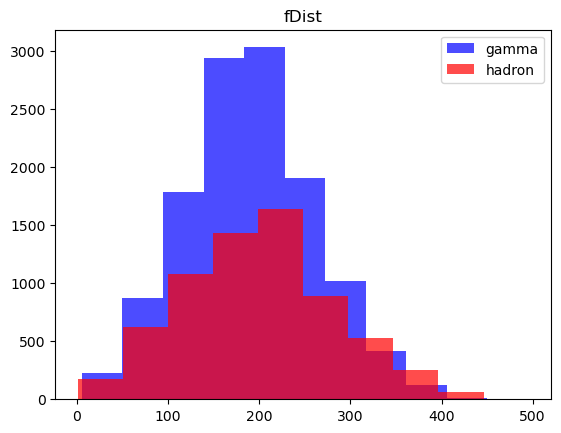

In [14]:
for labels in cols[:-1]:
    plt.hist(partical_data[partical_data['class']==1][labels],color='blue',label='gamma',alpha=0.7)
    plt.hist(partical_data[partical_data['class']==0][labels],color='red',label='hadron',alpha=0.7)
    plt.title(labels)
    plt.legend()
    plt.show()

#### Now lets divide the dataset based on features and target values i.e x,y

In [16]:
# Define features and target variable
X = partical_data.drop(columns=['class'])  # Features
y = partical_data['class']  # Target variable (binary: 1=g, 0=h)


### Split Data into Training & Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)  # Ensures balanced class distribution


### Apply Resampling (Balancing Classes using SMOTE)
##### Since the dataset is imbalanced (g: 12332, h: 6688), apply Synthetic Minority Over-sampling (SMOTE) to create synthetic samples for the minority class.



###### Generates synthetic minority class samples only on training data (avoids test contamination).
###### Balances class distribution for better model learning.

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())


Before SMOTE: {1: 9866, 0: 5350}
After SMOTE: {1: 9866, 0: 9866}


## Apply Standardization (Feature Scaling)

#### In the dataset we can see the scale of values for different lable varies  so by applying the standard scaler we can standardize the data set

Standardization is crucial in data preprocessing for machine learning, and here are a few key reasons why:

1. **Uniformity**: Standardization scales your data so that it has a mean of zero and a standard deviation of one. This ensures all features contribute equally to the model, preventing any feature from disproportionately influencing the outcome.

2. **Performance**: Many machine learning algorithms, such as support vector machines (SVM) and K-means clustering, rely on the distance between data points. Standardized data ensures that these distances are calculated consistently, improving algorithm performance.

3. **Convergence Speed**: Gradient-based algorithms like logistic regression and neural networks converge faster when the data is standardized. This is because the standardized data helps maintain a balanced step size during the optimization process, speeding up convergence.

4. **Interpretability**: Models become more interpretable when features are on a common scale. This allows for clearer insight into feature importance and the relationships between features.

5. **Handling Outliers**: While standardization does not eliminate outliers, it can mitigate their impact on the model by reducing the skewness of the data distribution.



In [24]:
scaler = StandardScaler()

# Fit & transform on training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


### Training different models based on the data preprocessing done over dataframe


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [27]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

# Train each model and store results
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {"Accuracy": accuracy, "Report": report}
    print(f"{name} Accuracy: {accuracy:.4f}\n")


Training Logistic Regression...
Logistic Regression Accuracy: 0.7789

Training Decision Tree...
Decision Tree Accuracy: 0.8118

Training Random Forest...
Random Forest Accuracy: 0.8738

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8641

Training AdaBoost...
AdaBoost Accuracy: 0.8223

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.8659

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.8210

Training XGBoost...


C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8778

Training Naive Bayes...
Naive Bayes Accuracy: 0.7256



In [28]:
# Print model performance
for model, metrics in results.items():
    print(f"🔹 {model}:\nAccuracy: {metrics['Accuracy']:.4f}\n")


🔹 Logistic Regression:
Accuracy: 0.7789

🔹 Decision Tree:
Accuracy: 0.8118

🔹 Random Forest:
Accuracy: 0.8738

🔹 Gradient Boosting:
Accuracy: 0.8641

🔹 AdaBoost:
Accuracy: 0.8223

🔹 Support Vector Machine:
Accuracy: 0.8659

🔹 K-Nearest Neighbors:
Accuracy: 0.8210

🔹 XGBoost:
Accuracy: 0.8778

🔹 Naive Bayes:
Accuracy: 0.7256



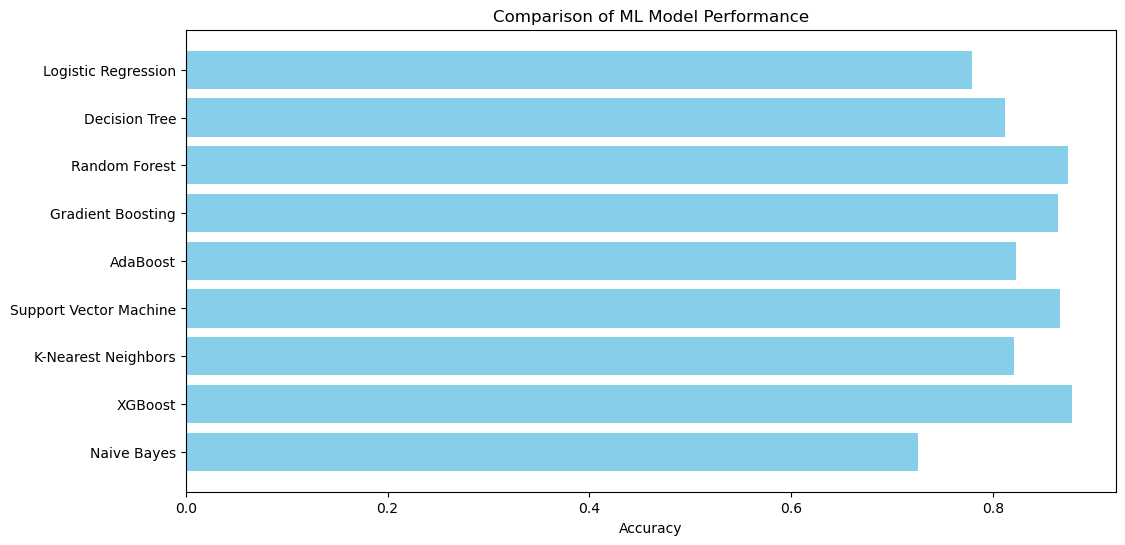

In [29]:
# Extract accuracy values
model_names = list(results.keys())
accuracies = [results[name]["Accuracy"] for name in model_names]

# Plot model performance
plt.figure(figsize=(12, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Comparison of ML Model Performance")
plt.gca().invert_yaxis()
plt.show()


In [30]:
for model_name, metrics in results.items():
    print(f"Classification Report for {model_name}:\n")
    print(metrics['Report'])
    print("\n" + "="*60 + "\n")


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.68      0.72      0.69      1338
           1       0.84      0.81      0.83      2466

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1338
           1       0.87      0.83      0.85      2466

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.81      0.81      3804



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1338
           1       0.90      0.91      0.90      2466

    accuracy                           0.87   

# Neural network

In [32]:
import tensorflow as tf

### Build the Neural Network Model

In [34]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])




### Compile the Model

In [36]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

#### Train the Model

In [38]:
history=nn_model.fit(X_train_scaled, y_train_resampled,epochs=100,batch_size=32)

Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7363 - loss: 0.5104
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.3637
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3621  
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.3479
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.3421
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3362
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3330  
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8518 - loss: 0.3342
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.3236
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8595 - loss: 0.3237
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8556 - loss: 0.3246  
Epoch 12/100
617/617 ━━━━━━━━━━━━━━

#### Make Predictions

In [40]:
y_pred_nn=nn_model.predict(X_test_scaled)

y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn_binary)
report_nn = classification_report(y_test, y_pred_nn_binary)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   


In [41]:
report_nn

'              precision    recall  f1-score   support\n\n           0       0.82      0.79      0.81      1338\n           1       0.89      0.91      0.90      2466\n\n    accuracy                           0.87      3804\n   macro avg       0.86      0.85      0.85      3804\nweighted avg       0.86      0.87      0.87      3804\n'

#### Evaluate Performance

In [43]:
report = classification_report(y_test, y_pred_nn_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)


              precision    recall  f1-score      support
0              0.822933  0.788490  0.805344  1338.000000
1              0.887787  0.907948  0.897755  2466.000000
accuracy       0.865931  0.865931  0.865931     0.865931
macro avg      0.855360  0.848219  0.851549  3804.000000
weighted avg   0.864976  0.865931  0.865250  3804.000000
